In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC



from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostClassifier

import warnings



# **1. Data Preprocessing**

In [ ]:
#loading the csv data to a pandas DataFrame
heart_data = pd.read_csv('/content/drive/MyDrive/heart/Heart_dataSet.csv')

In [ ]:
#print fist 5 rows of the data set
heart_data.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#print last 5 rows of the data set
heart_data.tail()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [ ]:
#number of rows and columns in the data set
heart_data.shape

(70000, 14)

In [ ]:
#getting some infor about data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


**1.1 Data Cleaning**

Data cleaning is crucial because it lays the groundwork for accurate, reliable, and efficient data analysis and modeling, ultimately leading to better-informed decisions and insights.

In [ ]:
#checking for missing values
heart_data.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#CHECK DUPLICATE VALUES
heart_data.duplicated().sum()

0

In [ ]:
#drop the unneccary columns--> index and id
heart_data.drop(['index', 'id'], axis = 1, inplace = True)

In [ ]:
# Check unique values of specified columns
colmuns_with_labels = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

for i in colmuns_with_labels:
    x = heart_data[i].unique()
    x.sort()
    print(i + " has values: " + str(x))

gender has values: [1 2]
cholesterol has values: [1 2 3]
gluc has values: [1 2 3]
smoke has values: [0 1]
alco has values: [0 1]
active has values: [0 1]


In [ ]:
# convert age into years
heart_data['age'] = heart_data['age'].apply(lambda x : int(x/365))

In [ ]:
#convert weight in to int
heart_data['weight'] =heart_data['weight'].apply(lambda x : int(x))

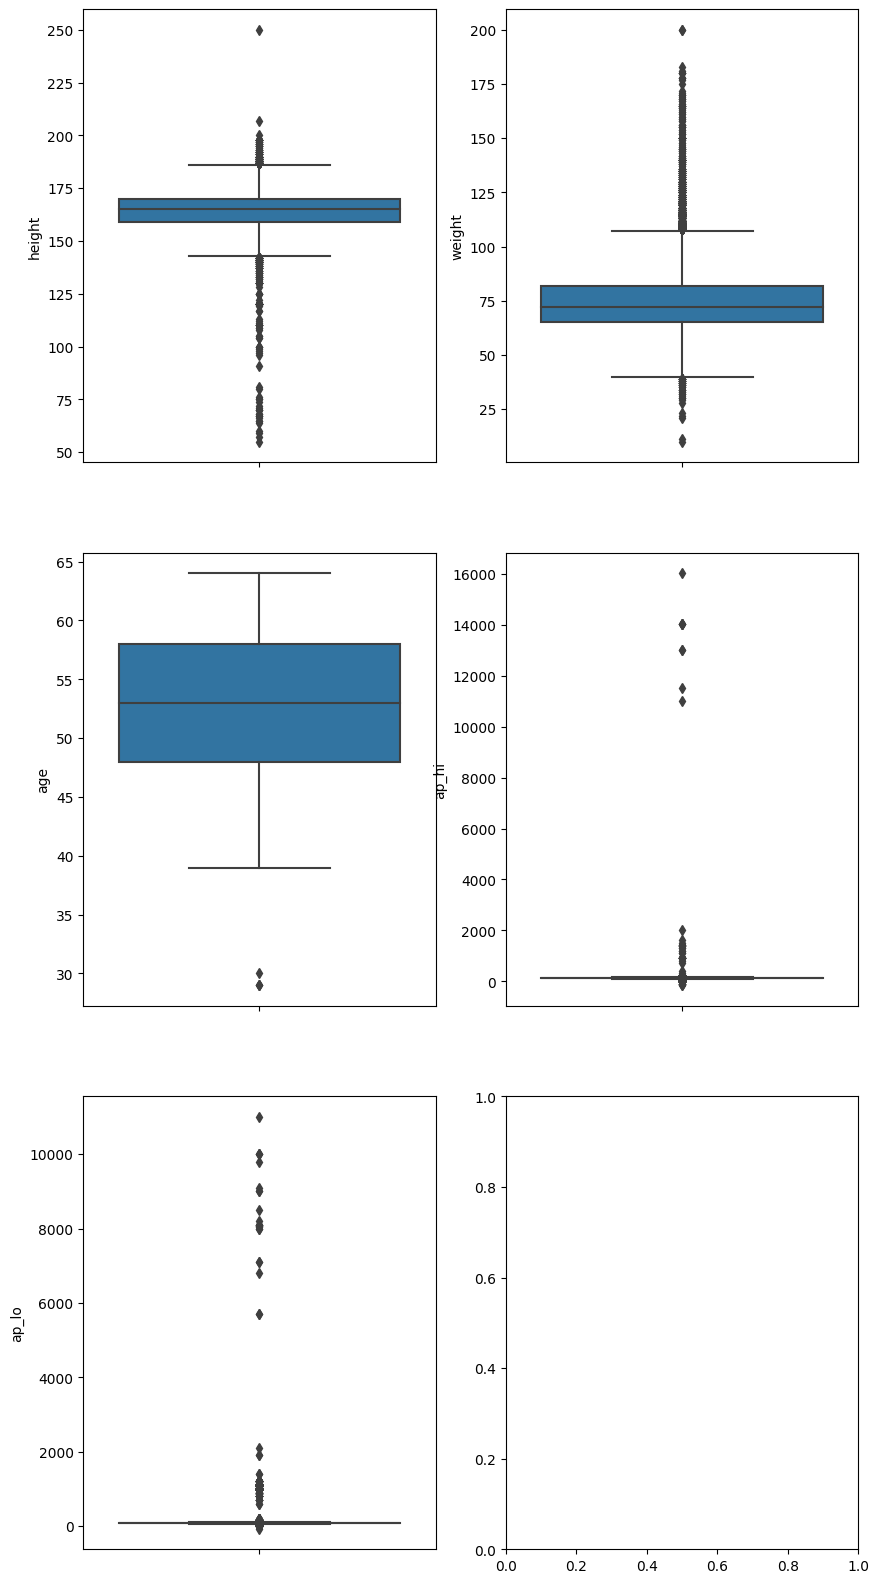

In [ ]:
#check outlier
heart_data_physio = heart_data[["height","weight","age","ap_hi", "ap_lo"]] # these variables have range
fig, axes = plt.subplots(3,2,figsize=(10,20))

ind = 1
for i in heart_data_physio.columns:
    if ind <= 6:
        plt.subplot(3,2,ind)
        sns.boxplot(data = heart_data_physio, y=i )
    ind = ind+1

In [ ]:
#resolve outlier

heart_data = heart_data[(heart_data["ap_hi"] < 200) & (heart_data["ap_hi"] > 50) & (heart_data["ap_lo"] < 200) & (heart_data["ap_lo"] > 50)]



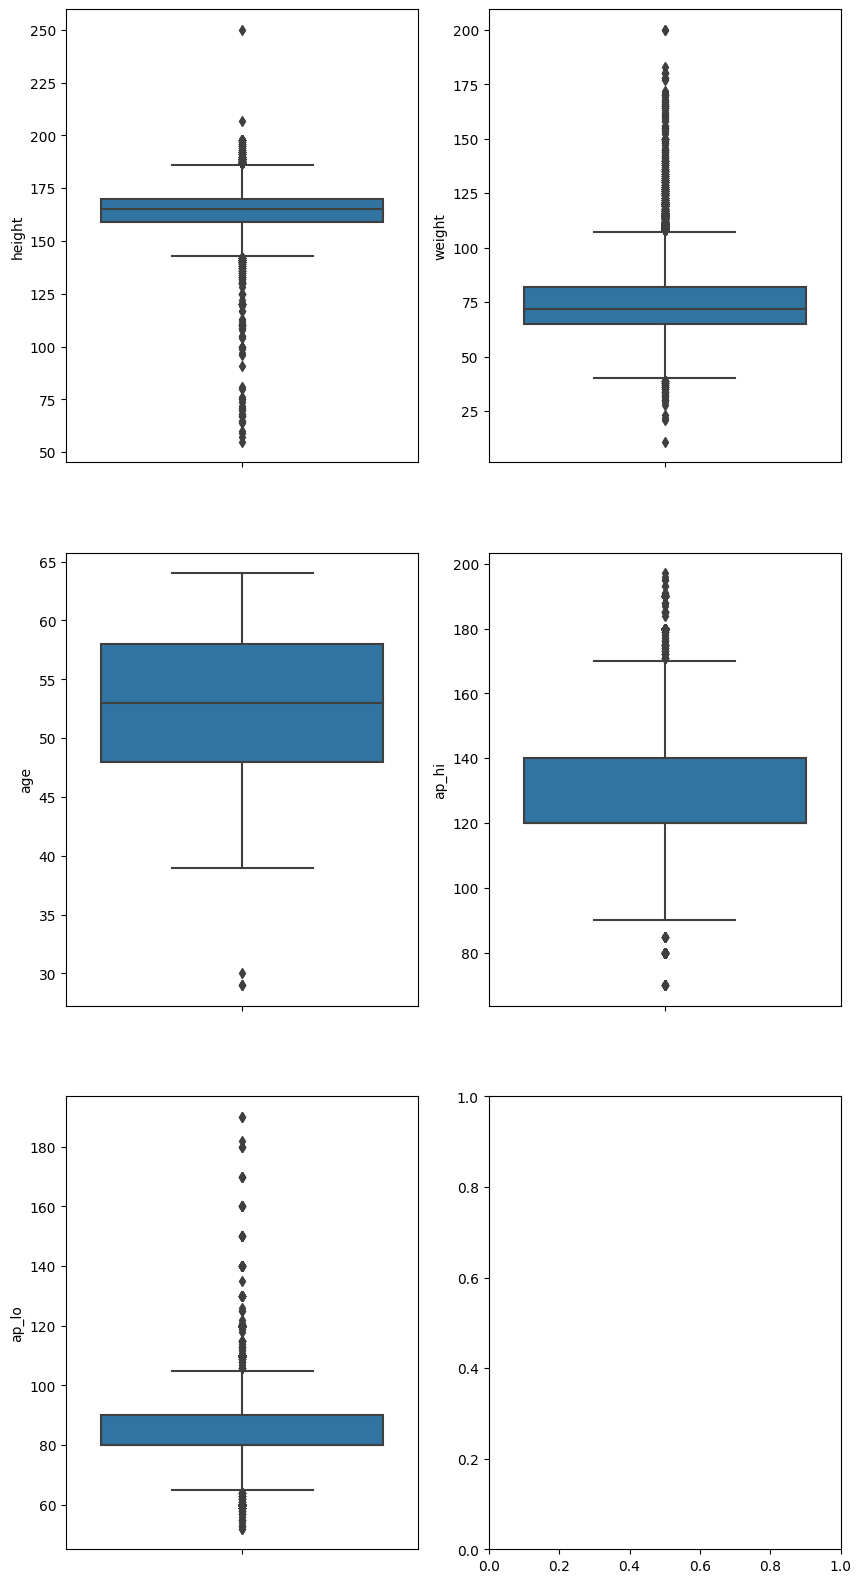

In [ ]:
ind = 1
fig, axes = plt.subplots(3,2,figsize=(10,20))
heart_data_physio = heart_data[["height","weight","age","ap_hi", "ap_lo"]]

for i in heart_data_physio.columns:
    if ind <= 6:
        plt.subplot(3,2,ind)
        sns.boxplot(data = heart_data_physio, y=i )
    ind = ind+1

In [ ]:
heart_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76,120,80,1,1,1,0,1,0
69996,61,1,158,126,140,90,2,2,0,0,1,1
69997,52,2,183,105,180,90,3,1,0,1,0,1
69998,61,1,163,72,135,80,1,2,0,0,0,1


In [ ]:
#statistical measures about the data
heart_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000,68550.000000
mean,52.827936,1.348607,164.366798,74.105689,126.465631,81.350343,1.363968,1.225514,0.087819,0.053494,0.803399,0.494311
std,6.769248,0.476533,8.179705,14.300444,16.329647,9.480968,0.678518,0.571600,0.283034,0.225018,0.397431,0.499971
min,29.000000,1.000000,55.000000,11.000000,70.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,197.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# checking the distributing of target variable
heart_data['cardio'].value_counts()

0    34665
1    33885
Name: cardio, dtype: int64

1--> Defective heart

0--> Healthy Haart

In [ ]:
heart_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,51,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,47,1,156,56,100,60,1,1,0,0,0,0


**1.2 Data Analysis**

In [ ]:
# Transformed the values in specific columns to more interpretable labels or categories as it makes the
# data more human-readable and facilitates better understanding during data analysis and exploration.

heart_data_analyze = heart_data.copy()
heart_data_analyze["gender"]= heart_data_analyze["gender"].apply(lambda x: "male" if x == 1 else "female")
heart_data_analyze["alco"]= heart_data_analyze["alco"].apply(lambda x: "No" if x == 0 else "Yes")
heart_data_analyze["smoke"]= heart_data_analyze["smoke"].apply(lambda x: "No" if x == 0 else "Yes")
heart_data_analyze["active"]= heart_data_analyze["active"].apply(lambda x: "No" if x == 0 else "Yes")

def transform_value(val):
    if val == 1:
        return "type 1"
    elif val == 2:
        return "type 2"
    else:
        return "type 3"

heart_data_analyze['cholesterol']= heart_data_analyze['cholesterol'].apply(transform_value)
heart_data_analyze['gluc']= heart_data_analyze['gluc'].apply(transform_value)

In [ ]:
heart_data_analyze.head()
heart_data_test = heart_data_analyze

**Distribution of cardiovascular disease**

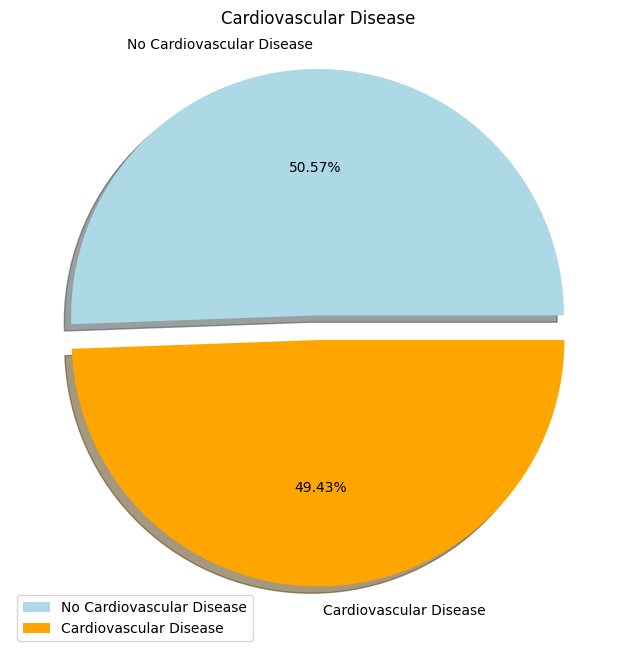

In [ ]:
plt.figure(figsize = (10, 8))
plt.title('Cardiovascular Disease')
plt.pie(heart_data_analyze['cardio'].value_counts(), labels = ['No Cardiovascular Disease', 'Cardiovascular Disease'], explode = (0.1, 0.0), colors = ['lightblue', 'orange'],autopct = '%1.2f%%', shadow = True)
plt.legend(loc = 'best')

**Distribution of values for categorical features**

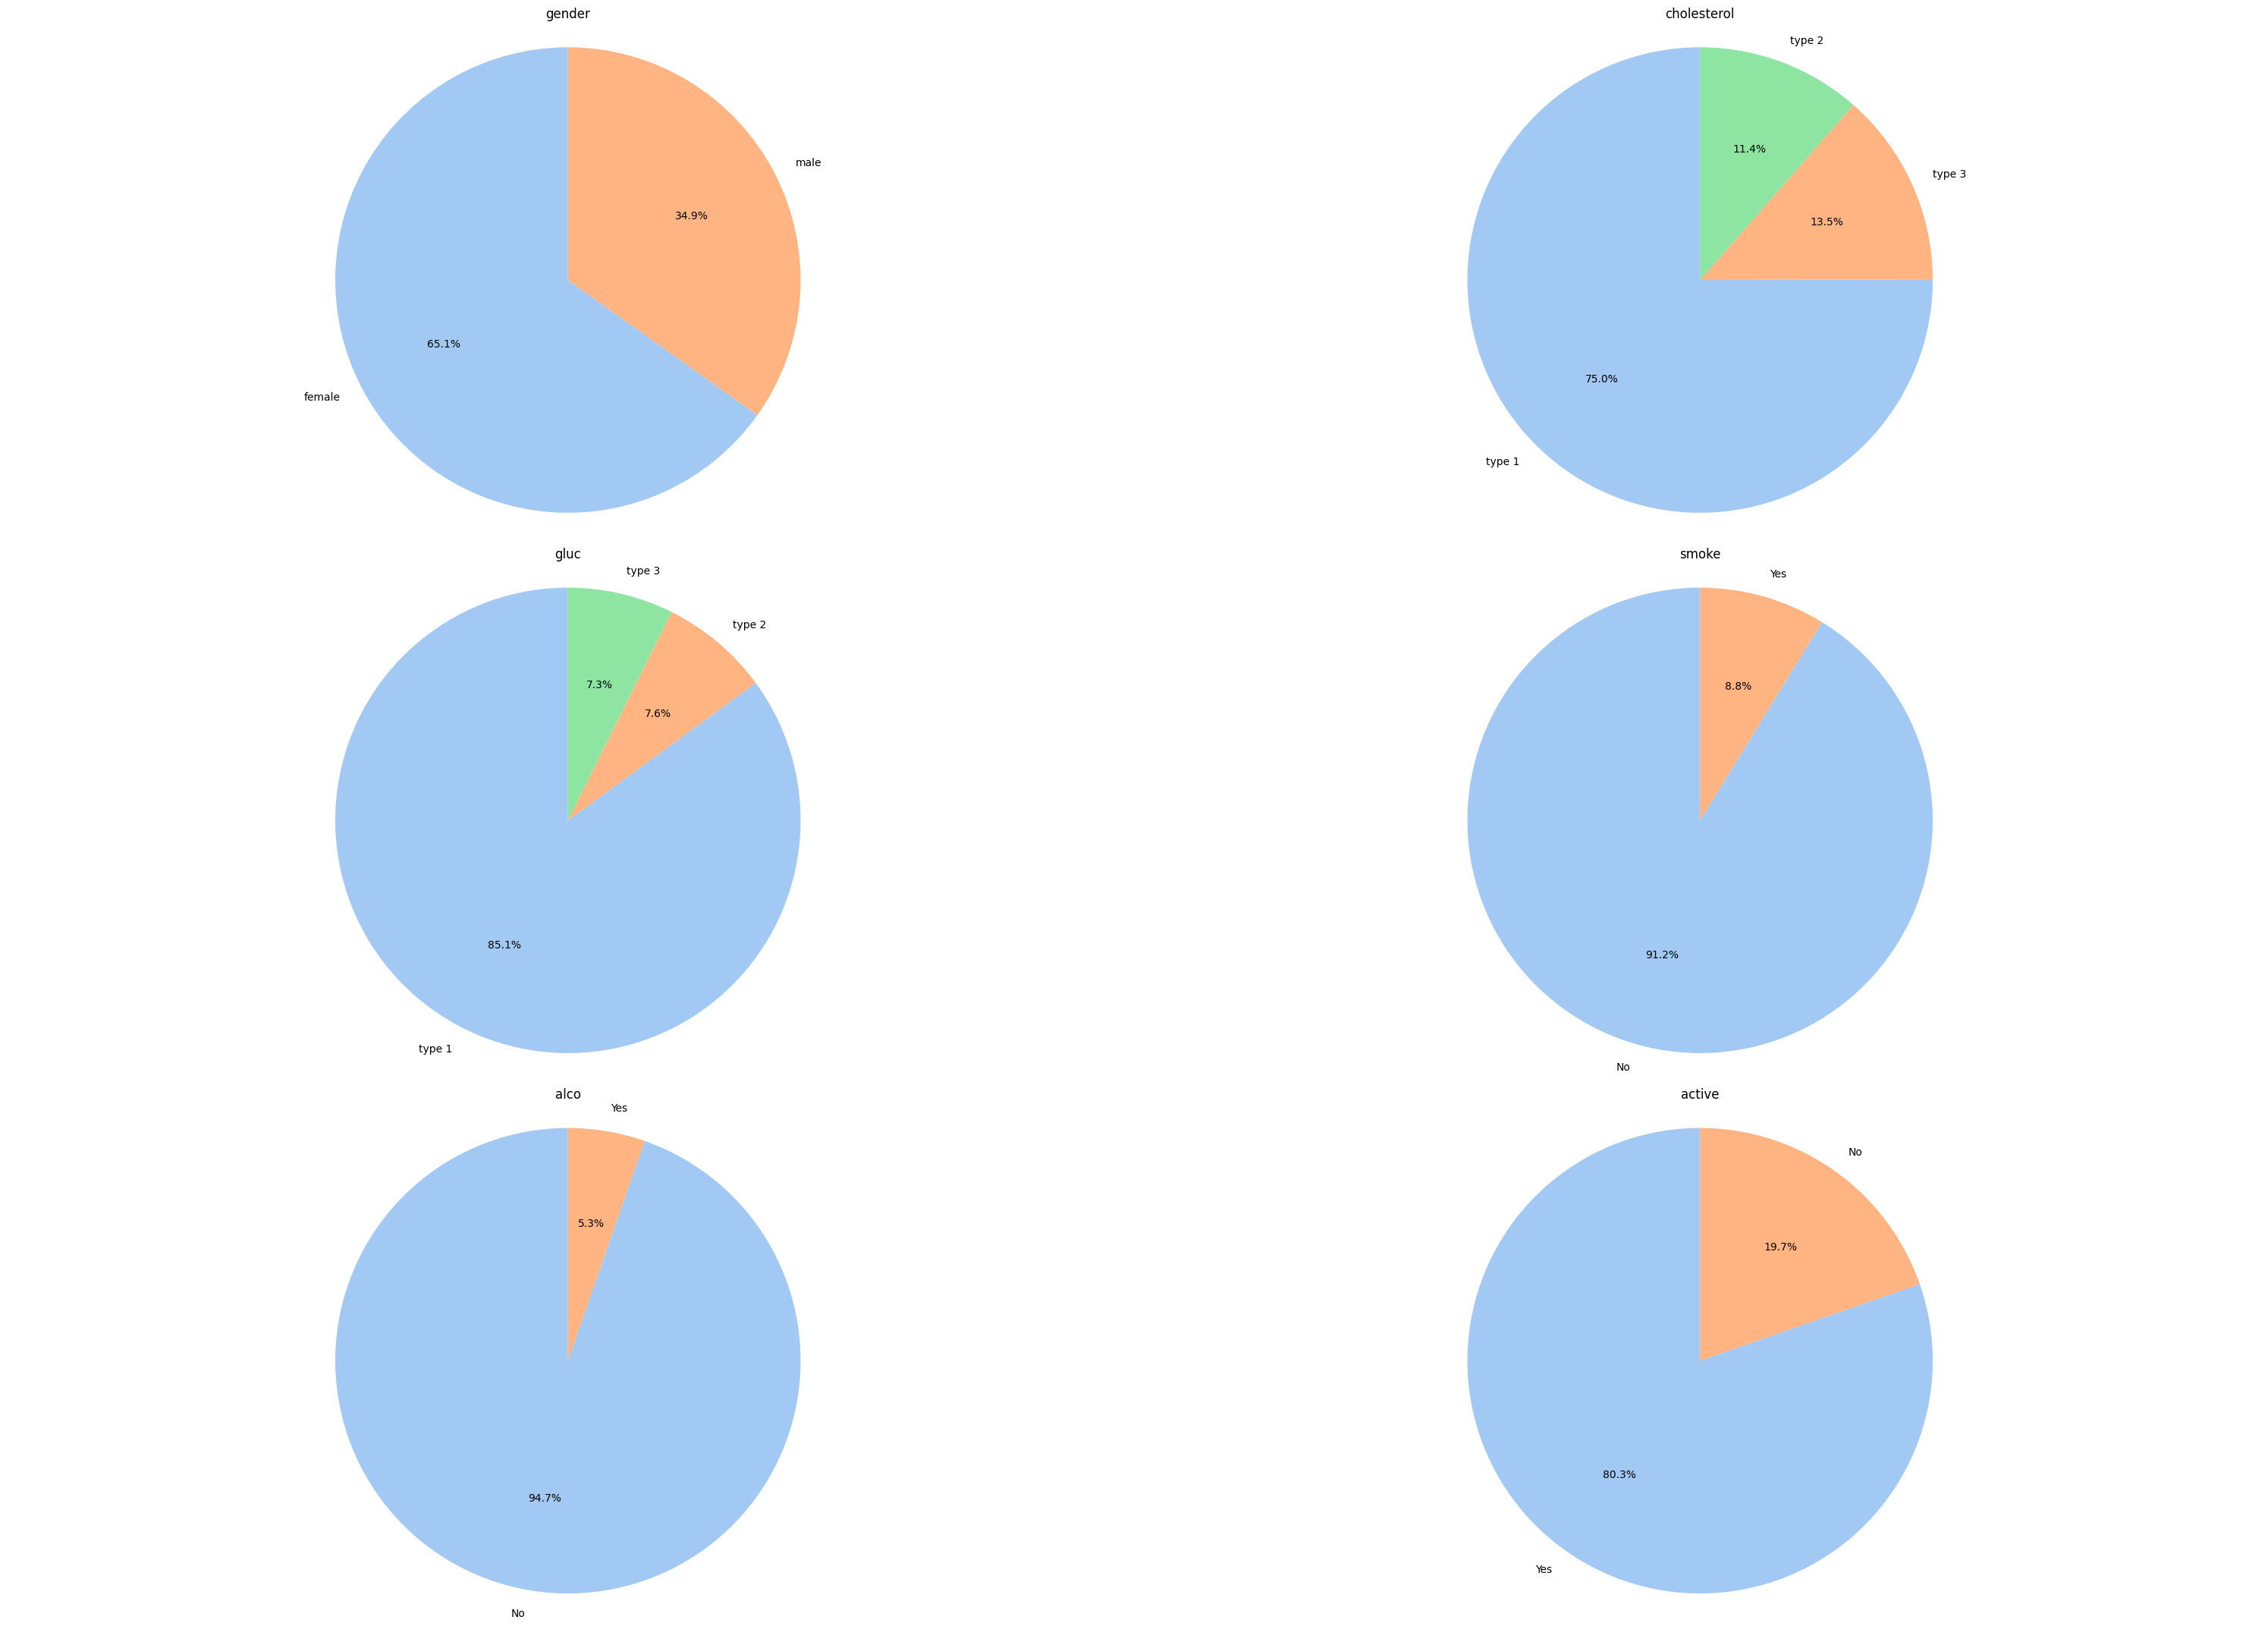

In [ ]:
plt.figure(figsize=(30, 50))

ind = 0
for i in colmuns_with_labels:
    ind = ind + 1
    plt.subplot(7, 2, ind)

    plt.pie(heart_data_analyze[i].value_counts(), labels=heart_data_analyze[i].unique(), autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)

    plt.axis('equal')
    plt.title(i)

plt.tight_layout()
plt.show()

**Distribution of cardio disease for age groups**

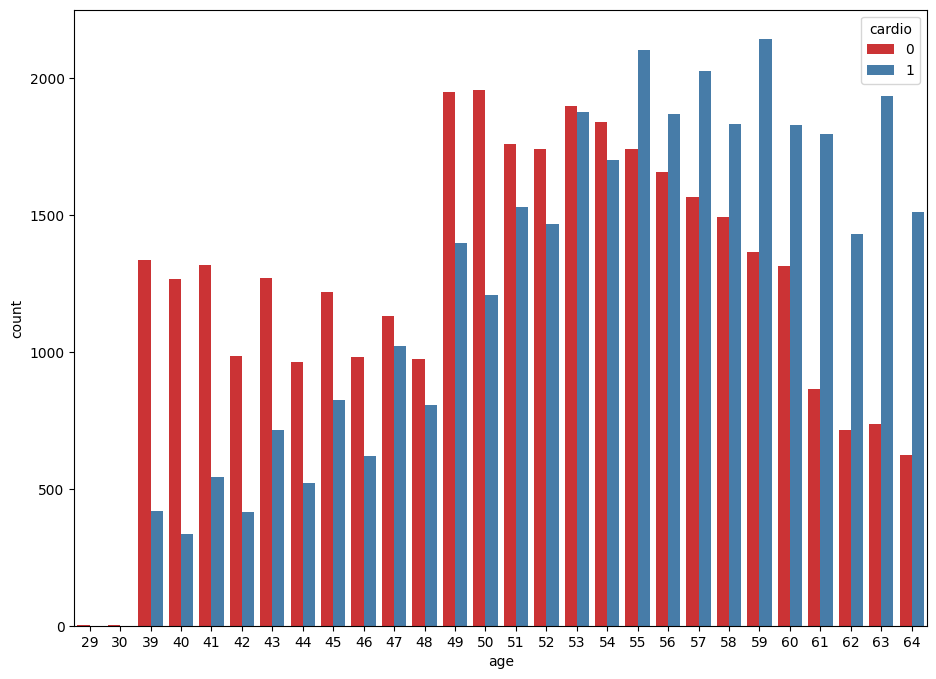

In [ ]:
plt.rcParams['figure.figsize'] = 11, 8
sns.countplot(x='age', hue='cardio', data = heart_data_analyze, palette="Set1");

In [ ]:
heart_data_physio  # give the  discribution details
#given only the column we got for the  check outiers
# check whetther have cardio or not

,height,weight,age,ap_hi,ap_lo
0,168,62,50,110,80
1,156,85,55,140,90
2,165,64,51,130,70
3,169,82,48,150,100
4,156,56,47,100,60
...,...,...,...,...,...
69995,168,76,52,120,80
69996,158,126,61,140,90
69997,183,105,52,180,90
69998,163,72,61,135,80


**1.3 Feature Selection and Data Transformation**

In [ ]:
#BMI, risk level scores, and pulse pressure are useful features in healthcare-related datasets as they provide insights into factors affecting cardiovascular health.
heart_data['pp'] = heart_data['ap_hi']-heart_data['ap_lo']  #pp = pulse pressure
heart_data["bmi"] = heart_data["weight"]/((heart_data["height"]/100)*(heart_data["height"]/100))

Health Risk Metric

Cholesterol Level: Weight = 3 (higher weight because cholesterol is a significant health risk factor).

Smoking Status: Weight = 3 (higher weight due to the strong association with health risks).

Glucose Level: Weight = 2 (moderate weight as elevated glucose levels are concerning).

Alcohol Consumption: Weight = 1 (lower weight as it has a less direct impact compared to the other factors).

In [ ]:
weights = {
    'Chol': 3,
    'Smoke': 3,
    'Gluc': 2,
    'Alco': 1
}

heart_data['health_risk_score'] = heart_data['cholesterol'] * weights['Chol'] + \
                           heart_data['gluc'] * weights['Gluc'] + \
                           heart_data['smoke'] * weights['Smoke'] + \
                           heart_data['alco'] * weights['Alco']

In [ ]:
# computes and stores the correlation matrix for the columns in the heart_data dataset.
heart_data_corr = heart_data.corr()
heart_data_corr

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pp,bmi,health_risk_score
age,1.000000,-0.023766,-0.081747,0.053579,0.209980,0.152448,0.154858,0.098591,-0.047765,-0.029125,-0.010318,0.239244,0.166412,0.086115,0.130530
gender,-0.023766,1.000000,0.499046,0.155996,0.059334,0.064723,-0.037030,-0.021268,0.338259,0.170557,0.005251,0.006580,0.029805,-0.096834,0.077431
height,-0.081747,0.499046,1.000000,0.292858,0.017793,0.033899,-0.050681,-0.018871,0.188046,0.094769,-0.008166,-0.011058,-0.002587,-0.287351,0.019283
weight,0.053579,0.155996,0.292858,1.000000,0.266995,0.246855,0.140194,0.106325,0.067095,0.068213,-0.017189,0.178579,0.169429,0.763749,0.164265
ap_hi,0.209980,0.059334,0.017793,0.266995,1.000000,0.692645,0.194188,0.091041,0.025367,0.030652,-0.000874,0.429148,0.819053,0.229669,0.180907
ap_lo,0.152448,0.064723,0.033899,0.246855,0.692645,1.000000,0.159600,0.075195,0.023523,0.042391,0.000746,0.336871,0.153504,0.204935,0.150935
cholesterol,0.154858,-0.037030,-0.050681,0.140194,0.194188,0.159600,1.000000,0.450928,0.009945,0.035384,0.009424,0.221245,0.139088,0.145595,0.880024
gluc,0.098591,-0.021268,-0.018871,0.106325,0.091041,0.075195,0.450928,1.000000,-0.005554,0.011120,-0.007240,0.089405,0.064915,0.101659,0.705701
smoke,-0.047765,0.338259,0.188046,0.067095,0.025367,0.023523,0.009945,-0.005554,1.000000,0.338539,0.025229,-0.016469,0.016043,-0.027833,0.321911
alco,-0.029125,0.170557,0.094769,0.068213,0.030652,0.042391,0.035384,0.011120,0.338539,1.000000,0.025111,-0.008381,0.008274,0.015268,0.204700


<Axes: title={'center': 'Correlation Matrix'}>

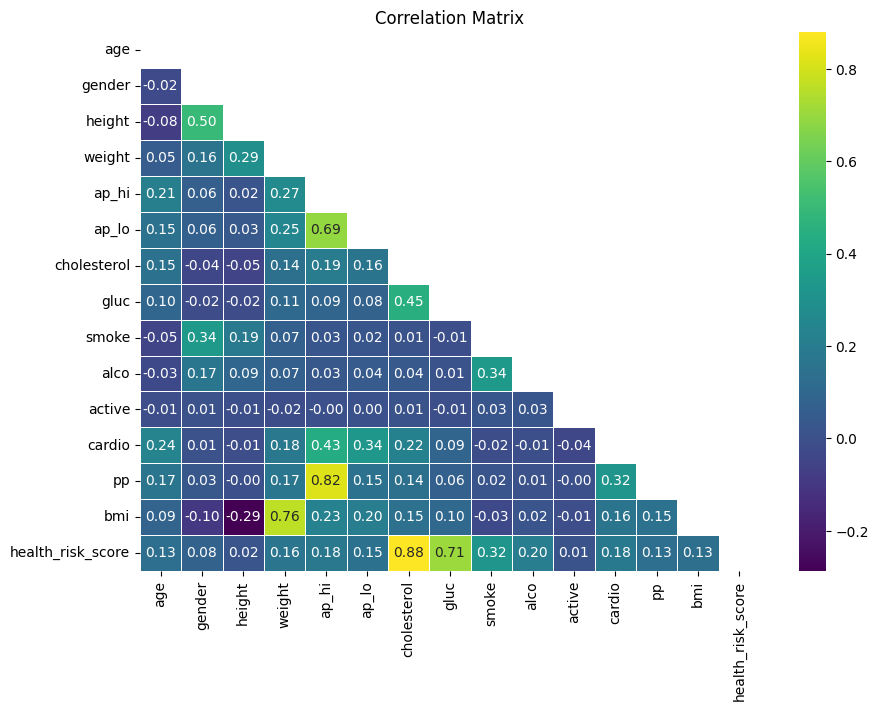

In [ ]:
mask = np.triu(heart_data_corr)
plt.figure(figsize = (10, 7))
plt.title("Correlation Matrix")
sns.heatmap(heart_data_corr, cmap = 'viridis', annot = True, mask = mask, linecolor = 'white', linewidth = 0.5, fmt = '.2f')

Drop features with the absulute value of correlation with cardio < 0.1

In [ ]:
heart_data = heart_data.drop(["gender","height","smoke","alco","gluc","active"], axis="columns")

In [ ]:
heart_data.head()

,age,weight,ap_hi,ap_lo,cholesterol,cardio,pp,bmi,health_risk_score
0,50,62,110,80,1,0,30,21.967120,5
1,55,85,140,90,3,1,50,34.927679,11
2,51,64,130,70,3,1,60,23.507805,11
3,48,82,150,100,1,1,50,28.710479,5
4,47,56,100,60,1,0,40,23.011177,5


In [ ]:
heart_data.tail()

,age,weight,ap_hi,ap_lo,cholesterol,cardio,pp,bmi,health_risk_score
69995,52,76,120,80,1,0,40,26.927438,8
69996,61,126,140,90,2,1,50,50.472681,10
69997,52,105,180,90,3,1,90,31.353579,12
69998,61,72,135,80,1,1,55,27.099251,7
69999,56,72,120,80,2,0,40,24.913495,8


# 2. Model Building and Evaluation




1. Logistic Regression

Split in to test and train data

In [ ]:
X = heart_data.drop(columns='cardio', axis=1)
Y = heart_data['cardio']

In [ ]:
print(X)

       age  weight  ap_hi  ap_lo  cholesterol  pp        bmi  \
0       50      62    110     80            1  30  21.967120   
1       55      85    140     90            3  50  34.927679   
2       51      64    130     70            3  60  23.507805   
3       48      82    150    100            1  50  28.710479   
4       47      56    100     60            1  40  23.011177   
...    ...     ...    ...    ...          ...  ..        ...   
69995   52      76    120     80            1  40  26.927438   
69996   61     126    140     90            2  50  50.472681   
69997   52     105    180     90            3  90  31.353579   
69998   61      72    135     80            1  55  27.099251   
69999   56      72    120     80            2  40  24.913495   

       health_risk_score  
0                      5  
1                     11  
2                     11  
3                      5  
4                      5  
...                  ...  
69995                  8  
69996          

In [ ]:
print(Y)

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 68550, dtype: int64


In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# print(X.shape, X_train.shape, X_test.shape)

In [ ]:
# model = LogisticRegression()

In [ ]:
#training the LogisticRegression model with training data
#model.fit(X_train, Y_train)

Model evaluation
Accuracy score

In [ ]:
# Accuracy on training data
# X_train_prediction = model.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
# print('Accuracy on Training data: ',training_data_accuracy)

In [ ]:
# Accuracy on test data
# X_test_prediction = model.predict(X_test)
# test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
# print('Accuracy on Test data: ',test_data_accuracy)

Training the model using a for loop

Accuracy on Training data:  0.7256746900072939
Accuracy on Testing data: 0.7277899343544858
precission 0.7487512487512488
recall :  0.6691964285714286


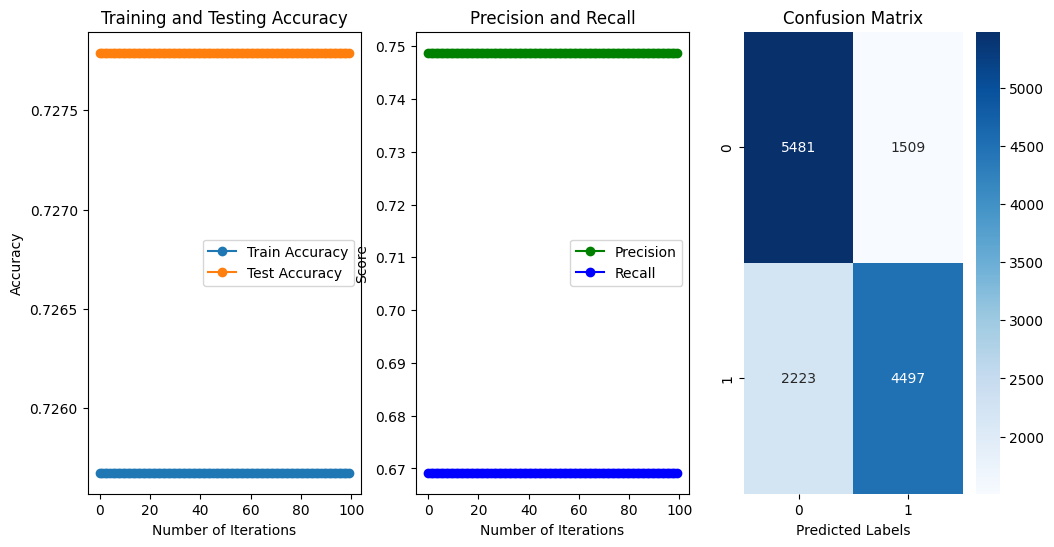

In [ ]:
# Split the data
# X = heart_data.drop('cardio', axis=1)
# y = heart_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Initialize the model1
model1 = LogisticRegression(max_iter=1000)  # Adjust max_iter as needed

# Lists to store training and testing metrics
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
precision_scores = []
recall_scores = []

# Train the model1 and collect metrics
for i in range(100):  # You can adjust the number of iterations
    model1.fit(X_train, y_train)

    # Training accuracy
    X_train_prediction = model1.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    train_accuracy.append(training_data_accuracy)

    # Testing accuracy
    y_pred = model1.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy.append(accuracy)

    # Precision and Recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # You can also add code here to collect loss values if the XGBoost library you're using provides them.
    # For example, you can collect them after each boosting round.

print('Accuracy on Training data: ',training_data_accuracy)
print("Accuracy on Testing data:", accuracy)
print("precission",precision)
print("recall : ",recall)

# Create a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(precision_scores, label='Precision', marker='o', color='g')
plt.plot(recall_scores, label='Recall', marker='o', color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(1, 3, 3)
# Plot train and test loss if available

# Display the confusion matrix
cm_LogisticRegression = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_LogisticRegression, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

plt.show()


2. XGB ** *italicized text*algorithm**

Accuracy on Training data:  0.7584062727935813
Accuracy on Testing data: 0.7324580598103574
precission 0.7477272727272727
recall :  0.6854166666666667


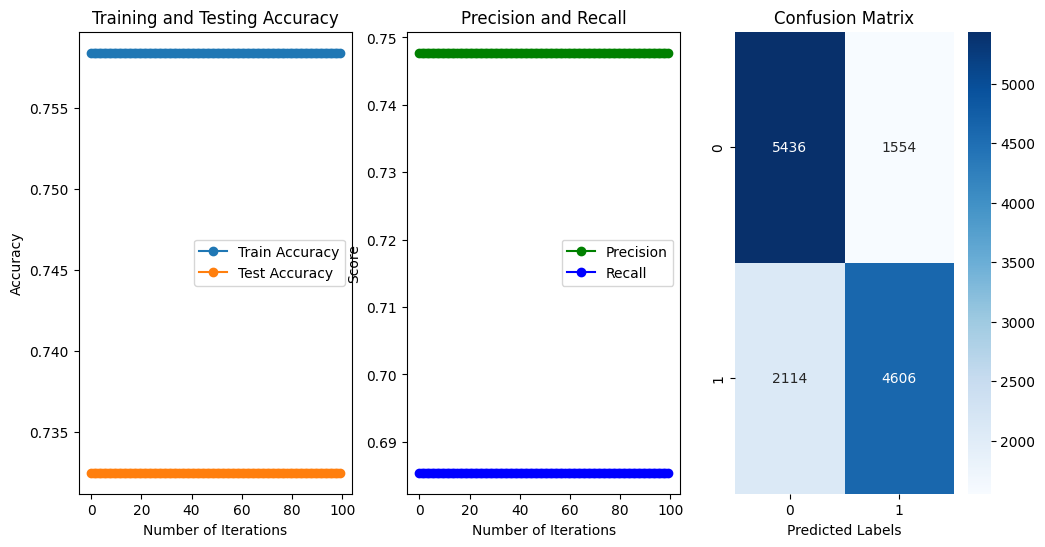

In [ ]:
# Split the data
X = heart_data.drop('cardio', axis=1)
y = heart_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model2
model2 = xgb.XGBClassifier()

# Lists to store training and testing metrics
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
precision_scores = []
recall_scores = []

# Train the model2 and collect metrics
for i in range(100):  # You can adjust the number of iterations
    model2.fit(X_train, y_train)

    # Training accuracy
    X_train_prediction = model2.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    train_accuracy.append(training_data_accuracy)

    # Testing accuracy
    y_pred = model2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy.append(accuracy)

    # Precision and Recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # You can also add code here to collect loss values if the XGBoost library you're using provides them.
    # For example, you can collect them after each boosting round.

print('Accuracy on Training data: ',training_data_accuracy)
print("Accuracy on Testing data:", accuracy)
print("precission",precision)
print("recall : ",recall)

# Create a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(precision_scores, label='Precision', marker='o', color='g')
plt.plot(recall_scores, label='Recall', marker='o', color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(1, 3, 3)
# Plot train and test loss if available

# Display the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

plt.show()


3. Decision Tree

Accuracy on Training data:  0.9653355215171407
Accuracy on Testing data: 0.6395331874544128
precission 0.6385166718603926
recall :  0.6098214285714286


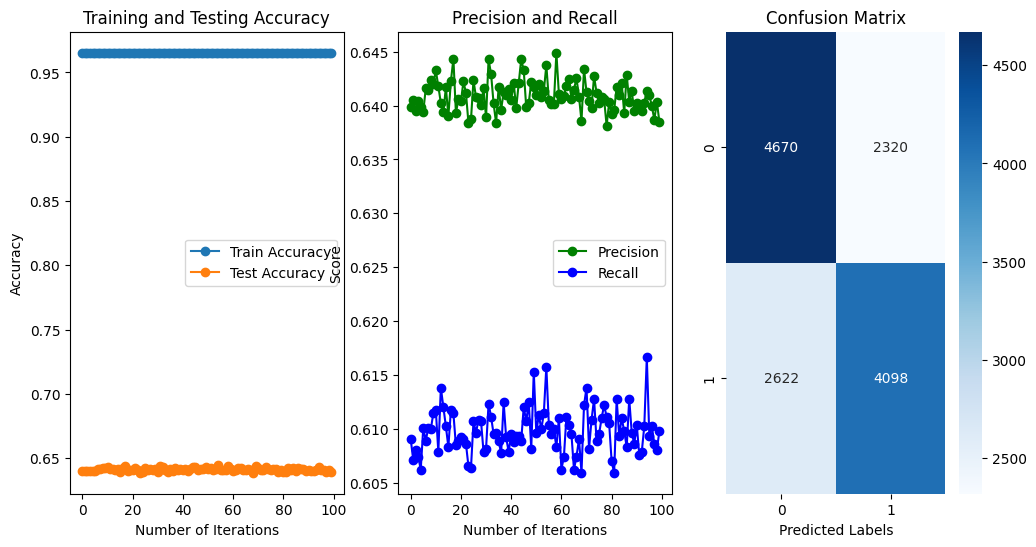

In [ ]:

# Split the data
X = heart_data.drop('cardio', axis=1)
y = heart_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the model3
model3 = DecisionTreeClassifier()

#Lists to store training and testing metrics

train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
precision_scores = []
recall_scores = []

# Train the model3 and collect metrics
for i in range(100):  # You can adjust the number of iterations
    model3.fit(X_train, y_train)

    # Training accuracy
    X_train_prediction = model3.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    train_accuracy.append(training_data_accuracy)

    # Testing accuracy
    y_pred = model3.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy.append(accuracy)

    # Precision and Recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

    # You can also add code here to collect loss values if the XGBoost library you're using provides them.
    # For example, you can collect them after each boosting round.

print('Accuracy on Training data: ',training_data_accuracy)
print("Accuracy on Testing data:", accuracy)
print("precission",precision)
print("recall : ",recall)

# Create a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(precision_scores, label='Precision', marker='o', color='g')
plt.plot(recall_scores, label='Recall', marker='o', color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(1, 3, 3)
# Plot train and test loss if available

# Display the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

plt.show()



4. Support Vector Classifier

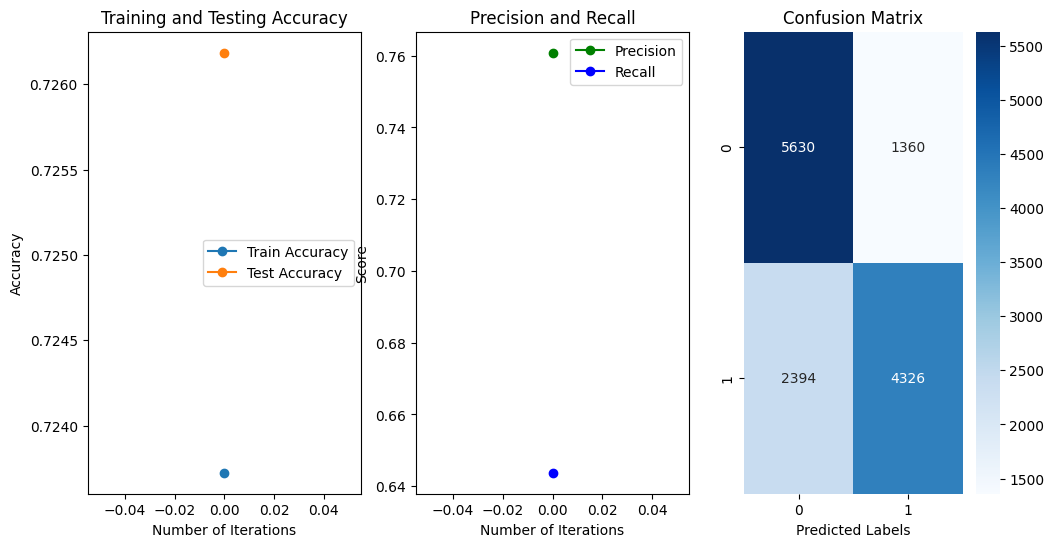

In [ ]:
from sklearn.svm import SVC
import numpy as np

# Split the data
X = heart_data.drop('cardio', axis=1)
y = heart_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model4
model4 = SVC()

# Lists to store training and testing metrics
train_accuracy = []
test_accuracy = []
precision_scores = []
recall_scores = []

# Train the model4 for a single iteration
model4.fit(X_train, y_train)

# Training accuracy
X_train_prediction = model4.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
train_accuracy.append(training_data_accuracy)

# Testing accuracy
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_accuracy.append(accuracy)

# Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision_scores.append(precision)
recall_scores.append(recall)


# Create a plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(precision_scores, label='Precision', marker='o', color='g')
plt.plot(recall_scores, label='Recall', marker='o', color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(1, 3, 3)
# Plot train and test loss if available

# Display the confusion matrix
cm_svc = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

plt.show()


In [ ]:

print('Accuracy on Training data: ',training_data_accuracy)
print("Accuracy on Testing data:", accuracy)
print("precission",precision)
print("recall : ",recall)


Accuracy on Training data:  0.7237235594456601
Accuracy on Testing data: 0.7261852662290299
precission 0.7608160393950053
recall :  0.64375


Comparing results form all models


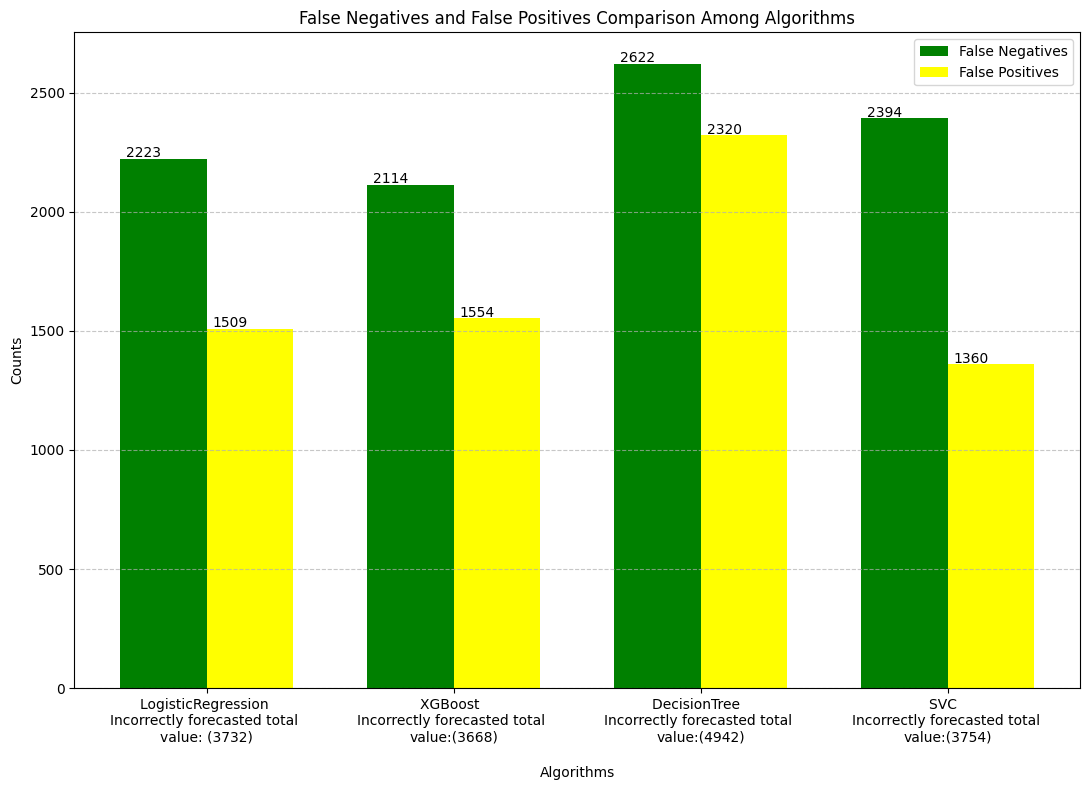

In [ ]:
tn_lg, fp_lg, fn_lg, tp_lg = cm_LogisticRegression.ravel()
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
tn_tree, fp_tree, fn_tree, tp_tree = cm_tree.ravel()
tn_svc, fp_svc, fn_svc, tp_svc = cm_svc.ravel()

fn_values = [fn_lg, fn_xgb, fn_tree, fn_svc]
fp_values = [fp_lg, fp_xgb, fp_tree, fp_svc]

total_values = [fn + fp for fn, fp in zip(fn_values, fp_values)]

model_names = ["LogisticRegression", "XGBoost", "DecisionTree","SVC"]

x = np.arange(len(model_names))
custom_labels = [f"LogisticRegression \nIncorrectly forecasted total \nvalue: ({total_values[0]})",
                 f"XGBoost  \nIncorrectly forecasted total \nvalue:({total_values[1]})\n",
                 f"DecisionTree  \nIncorrectly forecasted total \nvalue:({total_values[2]})\n",
                 f"SVC  \nIncorrectly forecasted total \nvalue:({total_values[3]})"]


fn_color = 'green'
fp_color = 'yellow'

bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width / 2, fn_values, width=bar_width, color=fn_color, label='False Negatives')
bar2 = ax.bar(x + bar_width / 2, fp_values, width=bar_width, color=fp_color, label='False Positives')

ax.set_xticks(x)
ax.set_xticklabels(custom_labels)

plt.xlabel('Algorithms')
plt.ylabel('Counts')
plt.title('False Negatives and False Positives Comparison Among Algorithms')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

for bar1, bar2, fn_value, fp_value in zip(bar1, bar2, fn_values, fp_values):
    ax.text(bar1.get_x() + bar1.get_width() / 2 - 0.08, fn_value + 5, str(fn_value), ha='center', fontsize=10, color='black')
    ax.text(bar2.get_x() + bar2.get_width() / 2 - 0.08, fp_value + 5, str(fp_value), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

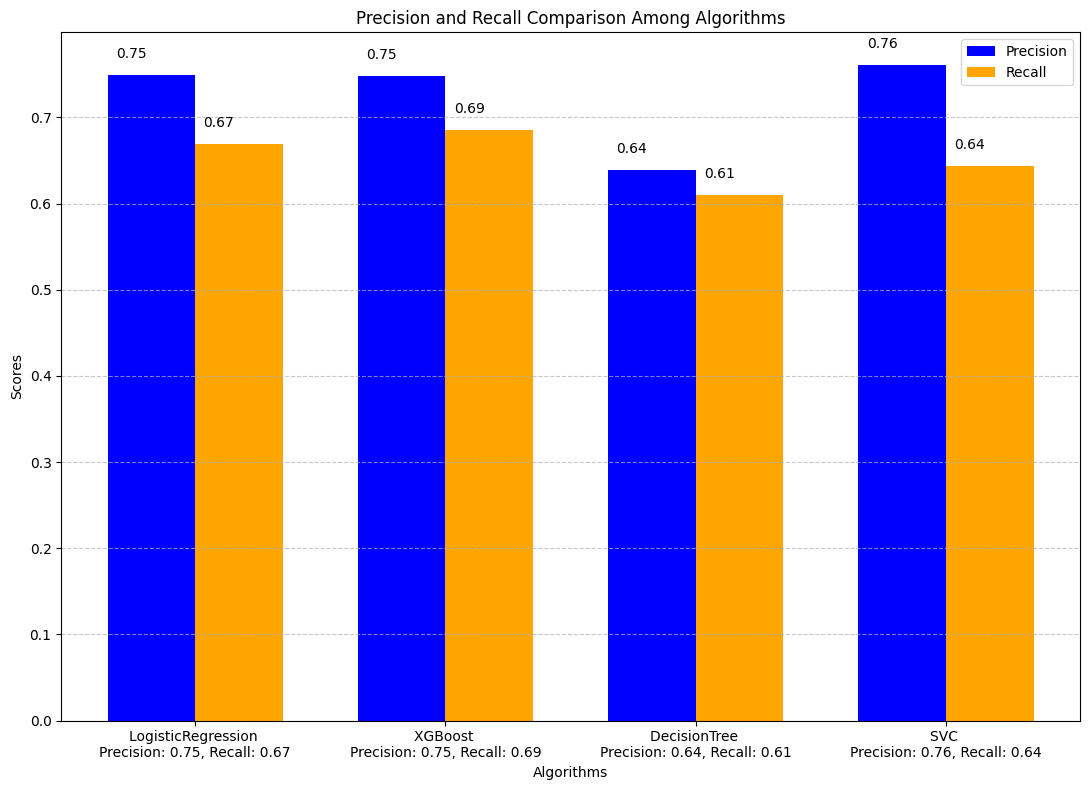

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the confusion matrix values for each model
tn_lg, fp_lg, fn_lg, tp_lg = cm_LogisticRegression.ravel()
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
tn_tree, fp_tree, fn_tree, tp_tree = cm_tree.ravel()
tn_svc, fp_svc, fn_svc, tp_svc = cm_svc.ravel()

# Calculate precision and recall for each model
precision_lg = tp_lg / (tp_lg + fp_lg) if (tp_lg + fp_lg) > 0 else 0
recall_lg = tp_lg / (tp_lg + fn_lg) if (tp_lg + fn_lg) > 0 else 0

precision_xgb = tp_xgb / (tp_xgb + fp_xgb) if (tp_xgb + fp_xgb) > 0 else 0
recall_xgb = tp_xgb / (tp_xgb + fn_xgb) if (tp_xgb + fn_xgb) > 0 else 0

precision_tree = tp_tree / (tp_tree + fp_tree) if (tp_tree + fp_tree) > 0 else 0
recall_tree = tp_tree / (tp_tree + fn_tree) if (tp_tree + fn_tree) > 0 else 0

precision_svc = tp_svc / (tp_svc + fp_svc) if (tp_svc + fp_svc) > 0 else 0
recall_svc = tp_svc / (tp_svc + fn_svc) if (tp_svc + fn_svc) > 0 else 0

# Assuming you have lists to store these precision and recall values
precision_scores = [precision_lg, precision_xgb, precision_tree, precision_svc]
recall_scores = [recall_lg, recall_xgb, recall_tree, recall_svc]


model_names = ["LogisticRegression", "XGBoost", "DecisionTree", "SVC"]

x = np.arange(len(model_names))
custom_labels = [f"{model} \nPrecision: {precision:.2f}, Recall: {recall:.2f}" for model, precision, recall in zip(model_names, precision_scores, recall_scores)]

precision_color = 'blue'
recall_color = 'orange'

bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width / 2, precision_scores, width=bar_width, color=precision_color, label='Precision')
bar2 = ax.bar(x + bar_width / 2, recall_scores, width=bar_width, color=recall_color, label='Recall')

ax.set_xticks(x)
ax.set_xticklabels(custom_labels)

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison Among Algorithms')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()

for bar1, bar2, precision, recall in zip(bar1, bar2, precision_scores, recall_scores):
    ax.text(bar1.get_x() + bar1.get_width() / 2 - 0.08, precision + 0.02, f'{precision:.2f}', ha='center', fontsize=10, color='black')
    ax.text(bar2.get_x() + bar2.get_width() / 2 - 0.08, recall + 0.02, f'{recall:.2f}', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Hyper Parameter tunning for XGBoost model

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Accuracy on Testing data: 0.738001458789205
Precision: 0.7538961038961038
Recall :  0.6910714285714286


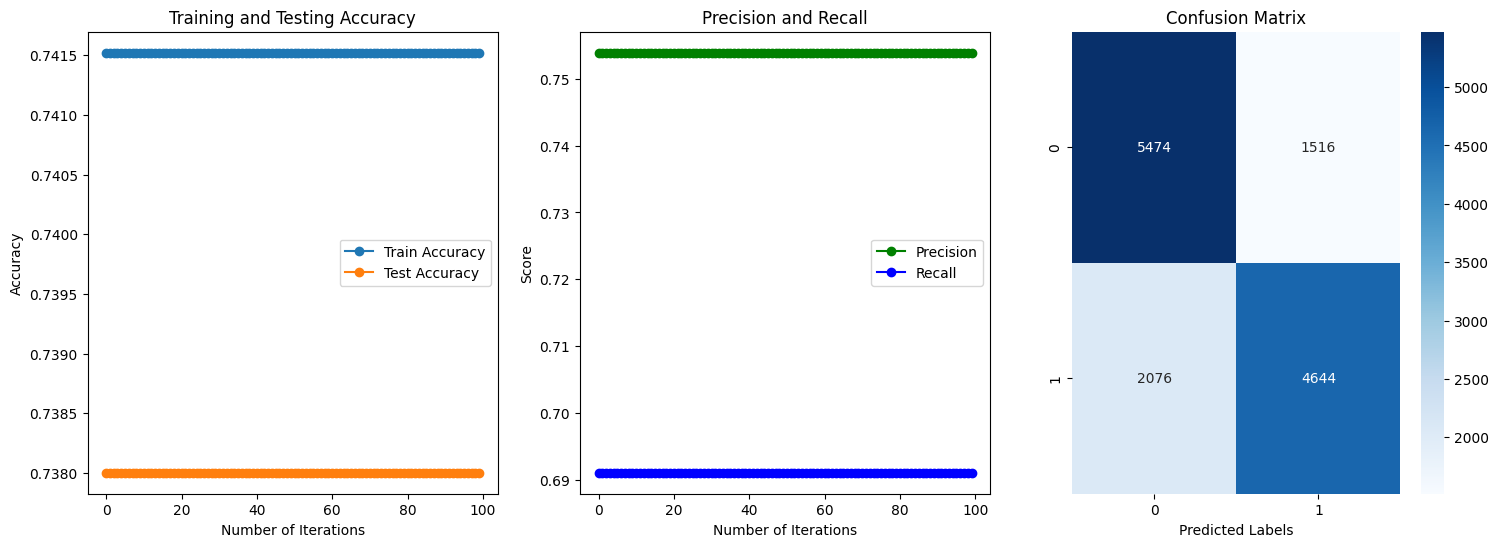

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data
X = heart_data.drop('cardio', axis=1)
y = heart_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Model Training and Metrics Collection
model2 = xgb.XGBClassifier(**best_params)  # Using the best parameters from GridSearchCV

# Lists to store training and testing metrics
train_accuracy = []
test_accuracy = []
precision_scores = []
recall_scores = []

# Train the model and collect metrics
for i in range(100):  # You can adjust the number of iterations
    model2.fit(X_train, y_train)

    # Training accuracy
    X_train_prediction = model2.predict(X_train)
    training_data_accuracy = accuracy_score(X_train_prediction, y_train)
    train_accuracy.append(training_data_accuracy)

    # Testing accuracy
    y_pred = model2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracy.append(accuracy)

    # Precision and Recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

print("Accuracy on Testing data:", accuracy)
print("Precision:", precision)
print("Recall : ", recall)

# Create a plot
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(train_accuracy, label='Train Accuracy', marker='o')
plt.plot(test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(precision_scores, label='Precision', marker='o', color='g')
plt.plot(recall_scores, label='Recall', marker='o', color='b')
plt.xlabel('Number of Iterations')
plt.ylabel('Score')
plt.title('Precision and Recall')
plt.legend()

plt.subplot(1, 3, 3)
# Plot train and test loss if available

# Display the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.title('Confusion Matrix')

plt.show()

# increase testiing accuracy after using hyper parameaters

# 3. Model Deployment

Saving the Selected trained model

In [ ]:
import pickle

filename = 'trained_model.sav'

#writing the model in binary format
pickle.dump(model2, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb')) #reading the binary format

**Building a Predictive System**

In [ ]:
#input_data
input_data = (50,1,158,72,120,80,1,1,0,0,1)

# Unpack the tuple into individual variables
age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active = input_data

# Convert age from years to days
age_in_days = age * 365  # Assuming an average year has 365 days

# BMI and pulse pressure
pp = ap_hi - ap_lo
bmi = weight / ((height / 100) * (height / 100))

# Calculating health risk score
weights = {
    'Chol': 3,
    'Smoke': 3,
    'Gluc': 2,
    'Alco': 1
}

health_risk_score = cholesterol * weights['Chol'] + gluc * weights['Gluc'] + smoke * weights['Smoke'] + alco * weights['Alco']

# Create modified input data as a tuple
modified_input_data = (age_in_days, weight, ap_hi, ap_lo, cholesterol, pp, bmi, health_risk_score)

# Display the modified input data
print(modified_input_data)

#Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(modified_input_data)

# Reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Select the model
selected_model = loaded_model

prediction = selected_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has a Heart Disease')


(18250, 72, 120, 80, 1, 40, 28.841531805800347, 5)
[1]
The Person has a Heart Disease


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 14.3 MB/s eta 0:00:00


[08:52:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


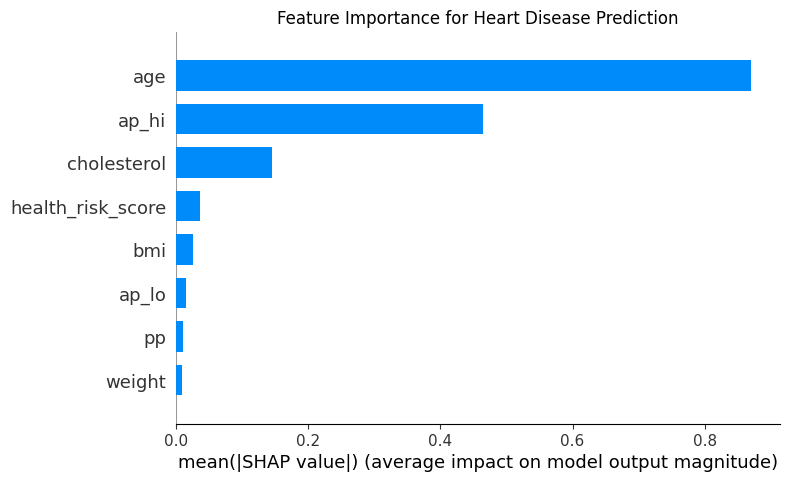

In [ ]:
import shap

user_df = pd.DataFrame(input_data_reshaped, columns=['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'pp','bmi','health_risk_score' ])

# Initialize an explainer with the loaded model
explainer = shap.Explainer(loaded_model)

# Calculate SHAP values for the user's data
shap_values = explainer.shap_values(user_df)

# Plot the summary plot
shap.summary_plot(shap_values, user_df, plot_type="bar", show=False)
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()